In [417]:
# https://www.kaggle.com/kernelgenerator/titanic-tutorial-for-beginners-part-1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import re # for Regular Expressions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from statistics import mode
from sklearn.model_selection import KFold, cross_val_score # for the cross-validation

%matplotlib inline 

# load training and test data
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')

In [418]:
# concatenating the 2 sets, 
# the non-existent Survived column will be filled with NaN in test set automatically
full = pd.concat([train, test])

In [419]:
# show percentages of null values
full.isnull().mean().sort_values(ascending = False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

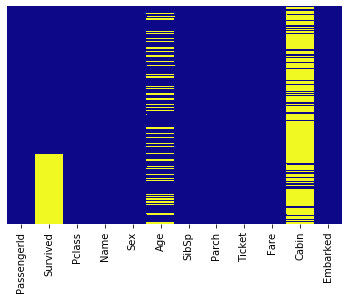

In [420]:
sns.heatmap(full.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

In [421]:
# mode is the value which appears the most often, it's S for embarked
# mode(full["Embarked"]) # => 'S'
full["Embarked"] = full["Embarked"].fillna(mode(full["Embarked"]))

In [422]:
# Convert 'Sex' variable to integer form!
full.loc[full.Sex == 'male', 'Sex'] = 0
full.loc[full.Sex == 'female', 'Sex'] = 1

# Convert 'Embarked' variable to integer form!
full.loc[full.Embarked == 'S', 'Embarked'] = 0
full.loc[full.Embarked == 'C', 'Embarked'] = 1
full.loc[full.Embarked == 'Q', 'Embarked'] = 2

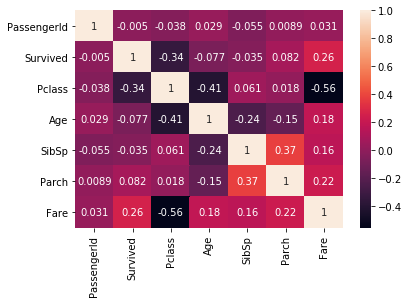

In [423]:
sns.heatmap(full.corr(), annot = True)

## Insert missing values based on full table so we have more accurate averages

In [424]:
# in age column Pclass has the highest correlation, so we use that to fill missing values
full['Age'] = full.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

In [425]:
# in Fare column Pclass has the highest correlation, so we use that to fill missing values
full['Fare'] = full.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [426]:
# fill missing cabins with new U type
full['Cabin'] = full['Cabin'].fillna('U')

In [427]:
# create list of unique values in Cabin column
full['Cabin'].unique().tolist()

['U',
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

In [428]:
# the first letters of the cabins seem to be referring to a specific part of the boat
# keep only the initials in the Cabin column
full['Cabin'] = full['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

In [429]:
# get a unique list of Initials from Cabin types
full['Cabin'].unique().tolist()

['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

In [430]:
# map the letters into numbers to be better for classification
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
full['Cabin'] = full['Cabin'].map(cabin_category)
full['Cabin'].unique().tolist()

[9, 3, 5, 7, 4, 1, 2, 6, 8]

## Extract name salutations

In [431]:
# Extract the salutation! A few letters with a . in the end
full['Title'] = full.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
full['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [432]:
# Look at salutations percentages
full['Title'].value_counts(normalize = True) * 100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Dr           0.611154
Rev          0.611154
Col          0.305577
Ms           0.152788
Mlle         0.152788
Major        0.152788
Don          0.076394
Dona         0.076394
Lady         0.076394
Mme          0.076394
Countess     0.076394
Sir          0.076394
Capt         0.076394
Jonkheer     0.076394
Name: Title, dtype: float64

In [433]:
# Apart from Mr, Miss, Mrs, and Master, the rest have percentages close to zero
# So we replace the rest with 'Other'
full['Title'] = full['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [434]:
full['Title'].value_counts(normalize = True) * 100

Mr        57.830405
Miss      19.862490
Mrs       15.049656
Master     4.660046
Other      2.597403
Name: Title, dtype: float64

In [435]:
# converting the salutations to numeric
title_category = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5}
full['Title'] = full['Title'].map(title_category)
full['Title'].unique().tolist()

[1, 3, 2, 4, 5]

In [436]:
# Sibsp is the number of siblings / spouses aboard
# Parch is the number of parents / children aboard
# So we calculate the family size
full['familySize'] = full['SibSp'] + full['Parch'] + 1

In [437]:
# Drop redundant features
full = full.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis = 1)

In [450]:
# recover the original test and train dataset
train = full[full['Survived'].notna()]
test = full[full['Survived'].isna()].drop(['Survived'], axis = 1)

In [451]:
# convert Survived values from float to int, it became float when concatenating
train.loc[:,'Survived'] = train.loc[:,'Survived'].astype(np.int8)

In [463]:
from sklearn.model_selection import train_test_split
# Set our robust cross-validation scheme!
kf = KFold(n_splits = 10)

# Here is out local validation scheme!
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis = 1), 
                                                    train['Survived'], test_size = 0.2, 
                                                    random_state = 2)
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [465]:
# Predict!
predictions = logisticRegression.predict(X_test)

In [466]:
# the fastest way to calculate accuracy
score = logisticRegression.score(X_test, y_test)
score

0.7932960893854749

In [458]:
confMatrix = confusion_matrix(y_test, predictions)
confMatrix

array([[96, 11],
       [15, 57]])

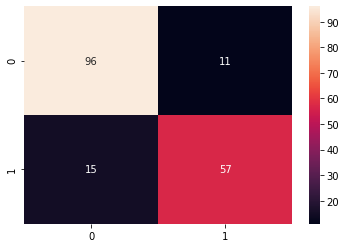

In [459]:
sns.heatmap(confMatrix, annot=True)

## Make predictions on the actual test set and create csv for submission

In [460]:
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(train.drop(['Survived'],axis=1), train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [461]:
test['Survived'] = logisticRegression.predict(test)

In [462]:
test[['PassengerId', 'Survived']].to_csv('data/kaggle_submission_3.csv', index = False)